# 1. Inspecting your data

If you want to solve a problem with machine learning, you'll need three things:

1. A good dataset;
2. A good model;
3. A good optimization algorithm.

If any of these three is not good enough, your trained model won't be good either. Many novice machine learning practitioners mainly focus on the second requirement, i.e., the model. While a good model certainly is a vital aspect of a succesful machine learning pipeline, if your data sucks, it doesn't really matter how advanced your model is. **The model can only be as good as the data.**

Therefore, your first step in a machine learning project should always be to **inspect your data**. And that's exactly what we'll do now!

## 1.1 Inspecting the filetree

Before you can start inspecting the data itself, you need to know how and where your data is stored.

For this example, download the [Gen 1 Pokemon Dataset from Kaggle](https://www.kaggle.com/datasets/echometerhhwl/pokemon-gen-1-38914), extract it and move it to the parent directory of this notebook. Rename the folder from `archive` to `PokemonGen1`.

We'll now inspect what's inside the `PokemonGen1` directory. For this, you can use the [`pathlib`](https://docs.python.org/3/library/pathlib.html) module from the Python standard library. A [`pathlib.Path`](https://docs.python.org/3/library/pathlib.html#pathlib.Path) object is an abstract representation of a path (e.g., to a file or directory) in your operating system.

Let's create a `Path` object for the `PokemonGen1` directory.

In [2]:
from pathlib import Path

data_path = Path('../data/Dataset')

To inspect the files in the directory, we can employ the [`glob()` method of the `Path` class](https://docs.python.org/3/library/pathlib.html#pathlib.Path.glob). This method expects a *pattern* and returns all paths that match the given pattern. In this pattern, an asterisk (`*`) is interpreted as a wildcard. So, to list all files in the `PokemonGen1` directory, we can pass in the pattern `*`:

In [3]:
gen = data_path.glob('*')

This will give you something like `<generator object Path.glob at 0x............>`. Indeed, the `glob()` method returns a Python [generator](https://wiki.python.org/moin/Generators), not a list. A generator is an object you can iterate over (just like a list) but that (unlike a list) cannot be indexed. A generator can only tell you the *next* iteration item.

> The advantage of generators is that they don't need to store all iteration items up-front. If the iteration items are large, or if there is a large number of items, a generator can save large amounts of memory.

To get the next item in a generator, you can use [the built-in Python function `next()`](https://docs.python.org/3/library/functions.html#next):

In [4]:
next(gen)

PosixPath('../data/Dataset/data')

Once you have iterated over all items, the generator can be considered *empty* and it will raise a [`StopIteration`](https://docs.python.org/3/library/exceptions.html#StopIteration) exception if you attempt to call `next()` with it.

In [5]:
next(gen)

StopIteration: 

The `StopIteration` is already raised with our second `next()` call, so we know that there is only one subdirectory in the `PokemonGen1` directory.

Of course, calling `next()` over and over on a generator that contains a lot of items is cumbersome. Luckily, we can also *iterate* over a generator with a simple `for` loop.

> ⚠️ **Only use new generators in `for` loops**
>
> You can think of iterating over a generator with a `for` loop as simply calling `next()` over and over, passing in the generator as an argument and stopping once a `StopIteration` exception is raised. If you have already called `next()` on the generator object, the `for` loop will start wherever the generator left off. **A for loop does not *rewind* a generator before it starts iterating!** (Btw, there is no such thing as *rewinding* a generator. Once an iteration item is returned, the generator forgets about it.) Therefore, to avoid subtle bugs, it is important to only use freshly created generators in `for` loops.

In [6]:
for p in data_path.glob('*'):
    print(p)

../data/Dataset/data


We can also collect all iteration items of a generator in a list by passing the generator to the [built-in function](https://docs.python.org/3/library/functions.html) [`list()`](https://docs.python.org/3/library/functions.html#func-list)...

In [7]:
list(data_path.glob('*'))

[PosixPath('../data/Dataset/data')]

...or by employing a [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp):

In [8]:
[p for p in data_path.glob('*')]

[PosixPath('../data/Dataset/data')]

As we saw from the previous cells, the `PokemonGen1` directory only contains a single directory, i.e., `PokemonGen1/data`. Let's inspect this directory as well:

In [9]:
pokemon_dirs = list(data_path.glob('data/*'))
pokemon_dirs

[PosixPath('../data/Dataset/data/Roblox'),
 PosixPath('../data/Dataset/data/Terraria'),
 PosixPath('../data/Dataset/data/Apex Legends'),
 PosixPath('../data/Dataset/data/Among Us'),
 PosixPath('../data/Dataset/data/God of War'),
 PosixPath('../data/Dataset/data/Genshin Impact'),
 PosixPath('../data/Dataset/data/Free Fire'),
 PosixPath('../data/Dataset/data/Fortnite'),
 PosixPath('../data/Dataset/data/Minecraft'),
 PosixPath('../data/Dataset/data/Forza Horizon')]

We can see that `PokemonGen1/data` contains a large number of subdirectories that correspond to different Pokémon names. How many Pokémon does our dataset contain?

In [10]:
len(pokemon_dirs)

10

We can inspect the total number of files that is in one of the subdirectories

In [11]:
all_files = list(data_path.glob('data/*/*'))
len(all_files)

10000

As these file paths are also represented with `pathlib.Path` objects, we can easily extract useful properties of the image paths, like the name, extension, stem, parent path,...

In [12]:
all_files[0]

PosixPath('../data/Dataset/data/Roblox/image_719.png')

In [13]:
all_files[0].stem

'image_719'

In [14]:
all_files[0].parent

PosixPath('../data/Dataset/data/Roblox')

In [15]:
all_files[0].parent.stem

'Roblox'

The `stem` is the path's name without suffix:

In [16]:
# ... zie boven... #

The `parent` attribute gives the path of the parent directory:

In [17]:
# ... zie boven ... #

Note that we can get the Pokémon's name from the name of the parent directory.

In [18]:
# ... zie boven ... #

We can also inspect the file extensions of all these files:

In [19]:
suffices = set()

for p in all_files:
    suffices.add(p.suffix)

suffices

{'.png'}

Or, with a set comprehension:

In [20]:
{p.suffix for p in all_files}

{'.png'}

From the above cells, we know that the subdirectories contain files with `.jpg` and `.png` extensions. In other words, when globbing the `PokemonGen1/data` directory, we'll get **35 626 images**.

## 1.2 Representing the dataset as a `DataFrame`

We're starting to get a feeling of how the files in the dataset are structured. The folder `PokemonGen1` contains a subdirectory `data`, and this directory contains multiple subdirectories, each of which corresponds to a Pokémon. The Pokémon directories contain files that have either a `.jpg` or a `.png` extension (i.e., images).

With `pathlib`'s `glob()`, we can explore our dataset in a rudimentary way. To understand our data more deeply, we can represent our dataset as a [`DataFrame` object from the `pandas` library](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). A DataFrame is a tabular data structure consisting of rows and columns, much like an Excel sheet.

We want to create a DataFrame that contains two columns: `image` and `label`. The `image` column contains the path to an image of a Pokémon, and the `label` column contains the corresponding name of that Pokémon.

You can construct a `DataFrame` by passing in a list of dictionaries. Each dictionary in the list corresponds to a row in the DataFrame. The dictionary keys correspond to column names, and the values to the value that should be in the table cell of that column and row.

For example:

In [21]:
import pandas as pd

pd.DataFrame([
    {}
])

Empty DataFrame
Columns: []
Index: [0]

We can iterate over all available data and store the image paths along with the Pokémon names.

In [22]:
rows = []
for p in data_path.glob('data/*/*'):
    rows.append({
            'image': p,
            'label': p.parent.name    
    })

pd.DataFrame(rows)

image          label
0            ../data/Dataset/data/Roblox/image_719.png         Roblox
1            ../data/Dataset/data/Roblox/image_950.png         Roblox
2            ../data/Dataset/data/Roblox/image_674.png         Roblox
3            ../data/Dataset/data/Roblox/image_949.png         Roblox
4            ../data/Dataset/data/Roblox/image_805.png         Roblox
...                                                ...            ...
9995  ../data/Dataset/data/Forza Horizon/image_366.png  Forza Horizon
9996  ../data/Dataset/data/Forza Horizon/image_873.png  Forza Horizon
9997  ../data/Dataset/data/Forza Horizon/image_948.png  Forza Horizon
9998  ../data/Dataset/data/Forza Horizon/image_309.png  Forza Horizon
9999  ../data/Dataset/data/Forza Horizon/image_501.png  Forza Horizon

[10000 rows x 2 columns]

Of course, you can also create the same DataFrame with a list comprehension:

In [23]:
#als list comprahension
df = pd.DataFrame([
    {
        'image': p,
        'label': p.parent.name
    }
    for p in data_path.glob('data/*/*')
])
df

image          label
0            ../data/Dataset/data/Roblox/image_719.png         Roblox
1            ../data/Dataset/data/Roblox/image_950.png         Roblox
2            ../data/Dataset/data/Roblox/image_674.png         Roblox
3            ../data/Dataset/data/Roblox/image_949.png         Roblox
4            ../data/Dataset/data/Roblox/image_805.png         Roblox
...                                                ...            ...
9995  ../data/Dataset/data/Forza Horizon/image_366.png  Forza Horizon
9996  ../data/Dataset/data/Forza Horizon/image_873.png  Forza Horizon
9997  ../data/Dataset/data/Forza Horizon/image_948.png  Forza Horizon
9998  ../data/Dataset/data/Forza Horizon/image_309.png  Forza Horizon
9999  ../data/Dataset/data/Forza Horizon/image_501.png  Forza Horizon

[10000 rows x 2 columns]

## 1.3 Visualizing data imbalance

A common problem in machine learning is *data imbalance*. This means that some classes have much more examples than others. Such an imbalance could cause a difference in model performance on the majority classes vs. the minority classes.

To visualize the number of images per class, we can use the plotting library [Matplotlib](https://matplotlib.org/).

In Matplotlib, plots are drawn on [`Figure`s](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure). A `Figure` contains one or more [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes), which is an area that will contain the actual plot.

To create a `Figure` with a single `Axes`, you can call [`matplotlib.pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) without any arguments.

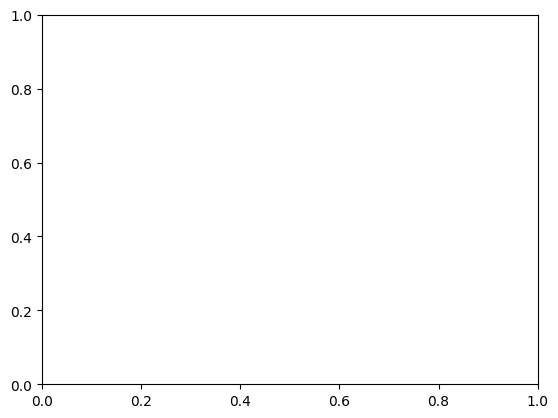

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Now, we'll use the [`DataFrame.groupby()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) to group the rows by `label` and apply [the built-in `len()` function](https://docs.python.org/3/library/functions.html#len) on each group to get the number of images per label.

In [25]:
df.groupby('label').apply(len)

label
Among Us          1000
Apex Legends      1000
Fortnite          1000
Forza Horizon     1000
Free Fire         1000
Genshin Impact    1000
God of War        1000
Minecraft         1000
Roblox            1000
Terraria          1000
dtype: int64

Let's put this in a variable called `count_per_label`:

In [26]:
count_per_label = df.groupby('label').apply(len)
count_per_label.index

Index(['Among Us', 'Apex Legends', 'Fortnite', 'Forza Horizon', 'Free Fire',
       'Genshin Impact', 'God of War', 'Minecraft', 'Roblox', 'Terraria'],
      dtype='object', name='label')

Now we want to draw a bar chart in our `Axes` with the labels as x-values and the counts as bar height.

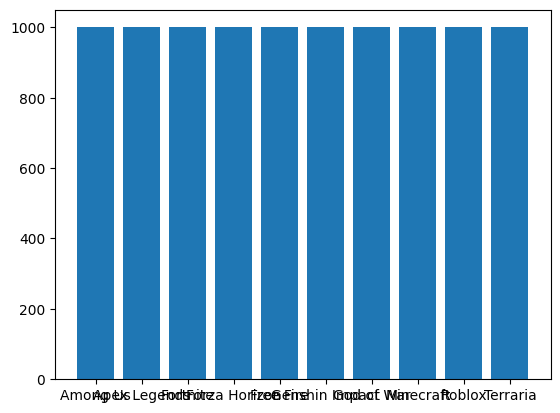

In [27]:
ax.bar(x=count_per_label.index, height=count_per_label)
fig

Woops, that looks pretty cluttered. Let's try with a larger figure.

<BarContainer object of 10 artists>

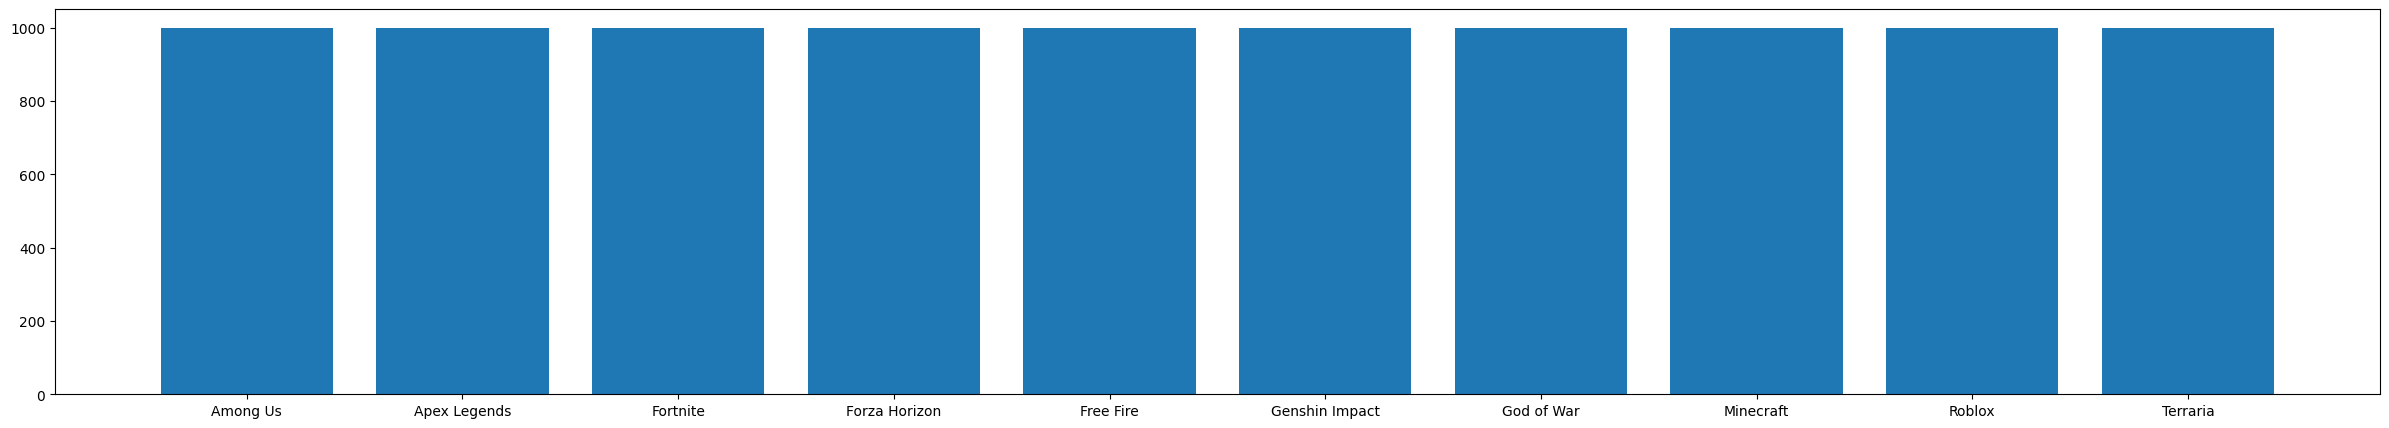

In [28]:
fig, ax = plt.subplots(figsize=(30,5))

ax.bar(x=count_per_label.index, height=count_per_label)


The bars are much clearer now, but the tick labels are still overlapping... We can *rotate* the tick labels with [`Axes.tick_params()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html):

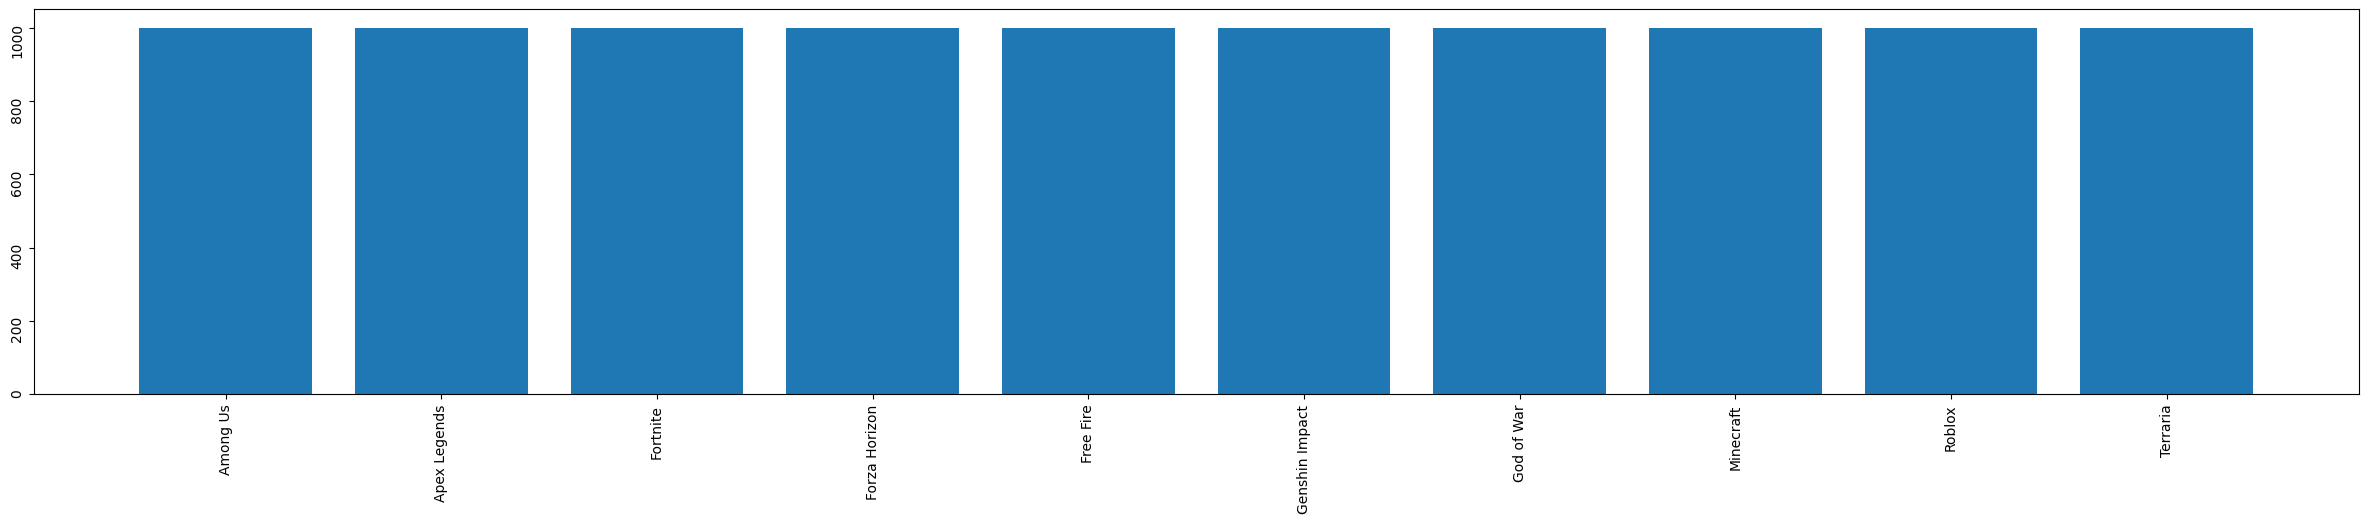

In [29]:
ax.tick_params(labelrotation=90)
fig

That's much more readable! To get a real sense of the data imbalance, it's best to **sort the labels in descending order of size**. You can do this by calling [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html) on `count_per_label`.

In [30]:
count_per_label = count_per_label.sort_values(ascending=False)

Let's see what we get now...

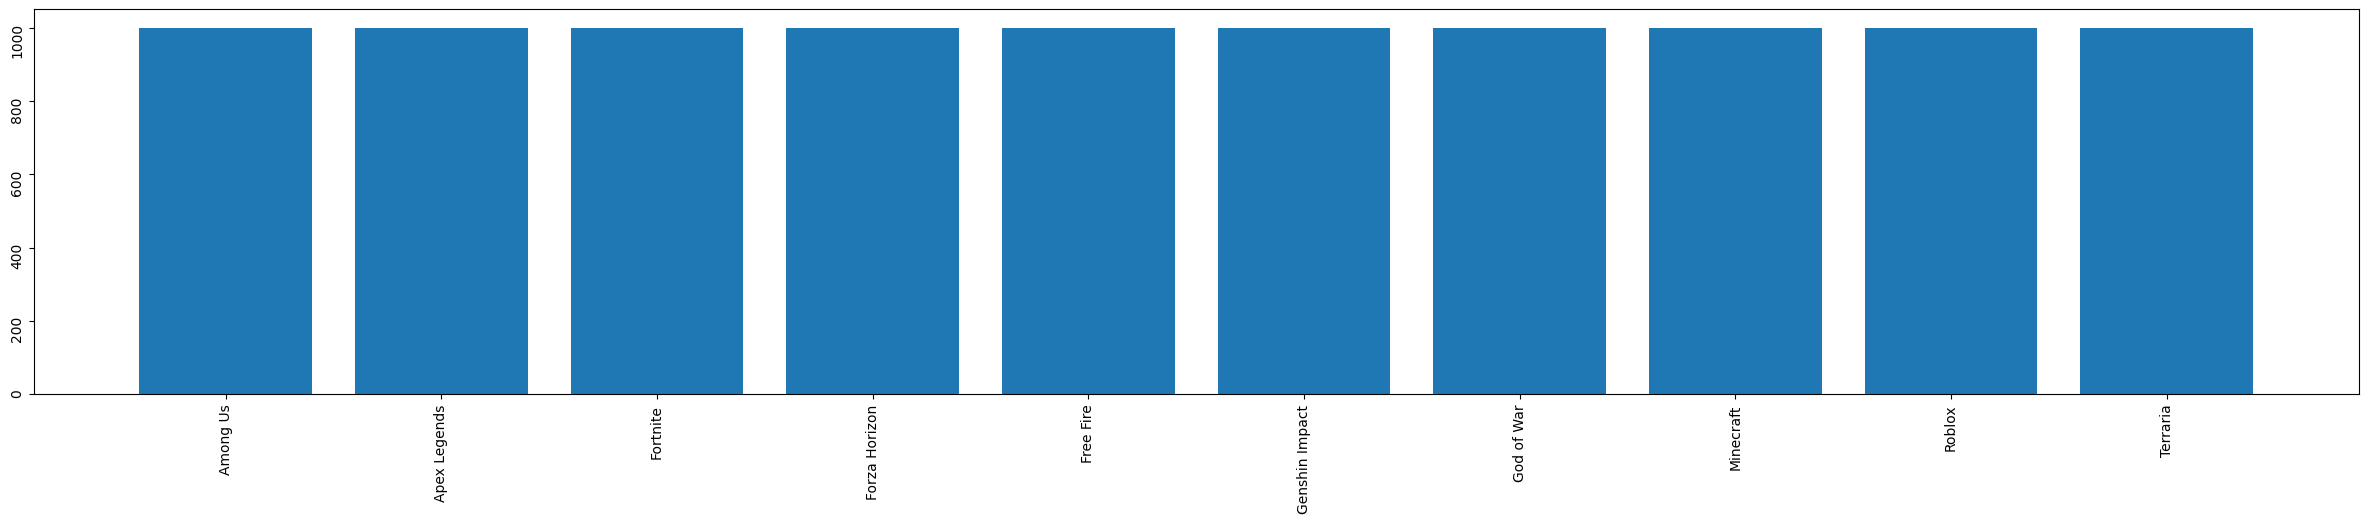

In [31]:
fig, ax = plt.subplots(figsize=(30,5))

ax.bar(x=count_per_label.index, height=count_per_label)
ax.tick_params(labelrotation=90)


Let's put everything together.

In [32]:
# ... WRITE YOUR CODE HERE ... #

Now, you should be careful drawing too many conclusions from this graph alone. It is not necessarily true that our model won't work on minority classes. However, the data imbalance we observe is something to take into account when evaluating a trained model, and it might push us toward data sampling strategies to counter the imbalance, if necessary.

To get an even better intuition of our data, let's take a look at some images!

## 1.4 Inspecting images and labels
### 1.4.1 Visualizing a single image

Let's visualize the first image in our dataset.

To obtain the elements of a column in a DataFrame, you can pass in the column name between square brackets.

In [33]:
df['label'], df['image']

(0              Roblox
 1              Roblox
 2              Roblox
 3              Roblox
 4              Roblox
             ...      
 9995    Forza Horizon
 9996    Forza Horizon
 9997    Forza Horizon
 9998    Forza Horizon
 9999    Forza Horizon
 Name: label, Length: 10000, dtype: object,
 0              ../data/Dataset/data/Roblox/image_719.png
 1              ../data/Dataset/data/Roblox/image_950.png
 2              ../data/Dataset/data/Roblox/image_674.png
 3              ../data/Dataset/data/Roblox/image_949.png
 4              ../data/Dataset/data/Roblox/image_805.png
                               ...                       
 9995    ../data/Dataset/data/Forza Horizon/image_366.png
 9996    ../data/Dataset/data/Forza Horizon/image_873.png
 9997    ../data/Dataset/data/Forza Horizon/image_948.png
 9998    ../data/Dataset/data/Forza Horizon/image_309.png
 9999    ../data/Dataset/data/Forza Horizon/image_501.png
 Name: image, Length: 10000, dtype: object)

The returned object is a pandas [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) object. This is somewhat comparable to a list. To get the value of the `image` column at row `0`, you can index with `[0]`.

In [34]:
df['image'][0]

PosixPath('../data/Dataset/data/Roblox/image_719.png')

Now, we can use [`PIL.Image.open()`](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) to open the image.

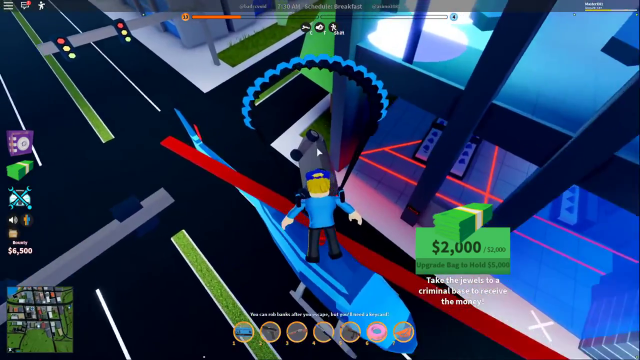

In [35]:
from PIL import Image

Image.open(df['image'][0])

As you can see, our image is represented as a PyTorch tensor of shape $\text{Channels}\times\text{Height}\times\text{Width}$, or simply $\text{C}\times\text{H}\times\text{W}$. To visualize this tensor, we can also use Matplotlib.

Let's create another `Figure` with a single `Axes`.

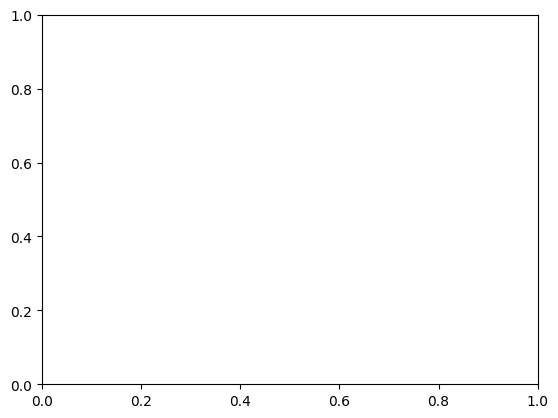

In [36]:
img = Image.open(df['image'][0])

fig, ax = plt.subplots()

Now, we can draw our image on the `Axes` with [`Axes.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html).

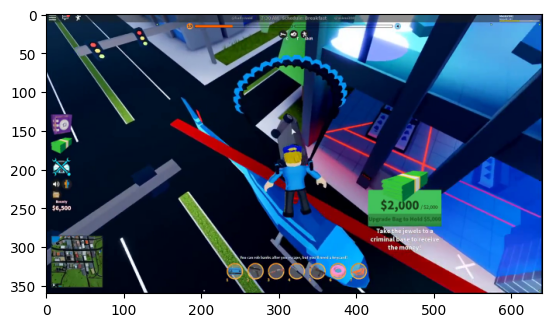

In [37]:
ax.imshow(img)
fig

To remove the ticks and tick labels, we can use [`Axes.tick_params()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html).

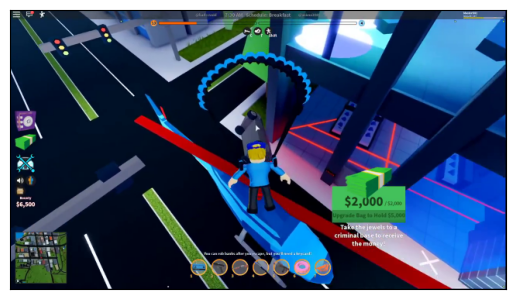

In [38]:
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
fig

And to remove the contouring black lines, we make the [*spines* of the `Axes`](https://matplotlib.org/stable/api/spines_api.html) invisible.

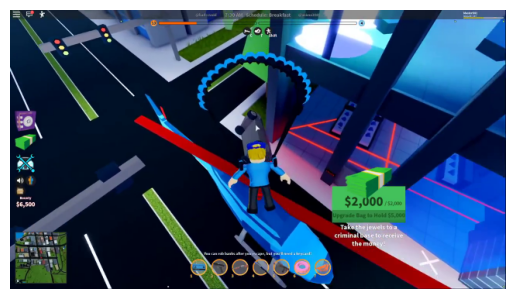

In [39]:
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
fig

Putting it all together, we have:

In [40]:
# ... WRITE YOUR CODE HERE ... #

### 1.4.2 Visualizing multiple images

Instead of viewing images one by one, we can save some time by visualizing a **grid** of images. To get the first 10 image paths in the DataFrame, we can run the following:

In [41]:
df['image'].iloc[:10]

0    ../data/Dataset/data/Roblox/image_719.png
1    ../data/Dataset/data/Roblox/image_950.png
2    ../data/Dataset/data/Roblox/image_674.png
3    ../data/Dataset/data/Roblox/image_949.png
4    ../data/Dataset/data/Roblox/image_805.png
5    ../data/Dataset/data/Roblox/image_157.png
6    ../data/Dataset/data/Roblox/image_149.png
7    ../data/Dataset/data/Roblox/image_676.png
8    ../data/Dataset/data/Roblox/image_478.png
9     ../data/Dataset/data/Roblox/image_10.png
Name: image, dtype: object

To visualize the image paths in this `Series` object, we'll need **multiple `Axes`** in our `Figure`. You can pass a number of rows (`nrows`) and a number of columns (`ncols`) to [`matplotlib.pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots).

For example, to create a `Figure` with 10 `Axes` in a 2 x 5 grid, you can do:

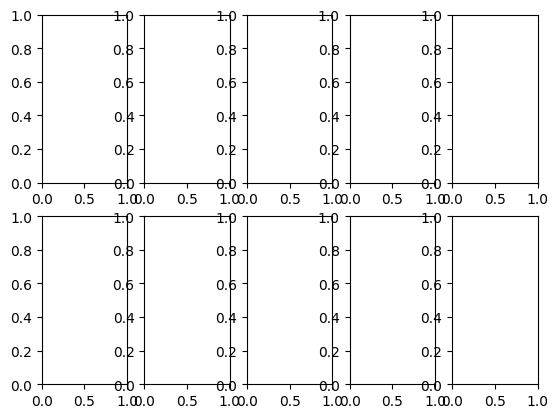

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=5)

The returned `axes` is a $2\times 5$ [numpy array](https://numpy.org/doc/stable/reference/generated/numpy.array.html) of `Axes` objects:

In [43]:
axes

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

We now want to call `imshow()` on each of these `Axes` objects, each time with another image we read in with `Image.open()`. To avoid nasty index computations, we can simply flatten our `axes` array, to get a flat numpy array of $10$ `Axes` objects:

In [44]:
axes.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

Now, we can iterate jointly over these 10 `Axes` objects and the first 10 image paths in our DataFrame. Such a joint iteration is easily done with [Python's built-in function `zip()`](https://docs.python.org/3/library/functions.html#zip).

In the loop itself, we can reuse our code to visualize a single image.

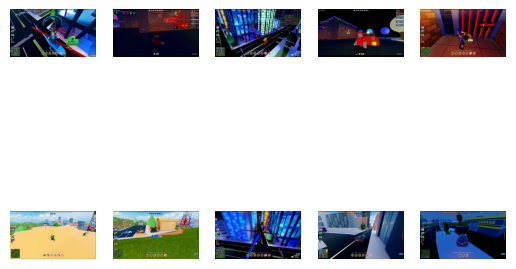

In [45]:
for img_path, ax in zip(df['image'].iloc[:10], axes.flatten()):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

fig
    

You can call [`Figure.tight_layout()`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.tight_layout) to reduce the padding between the `Axes`.

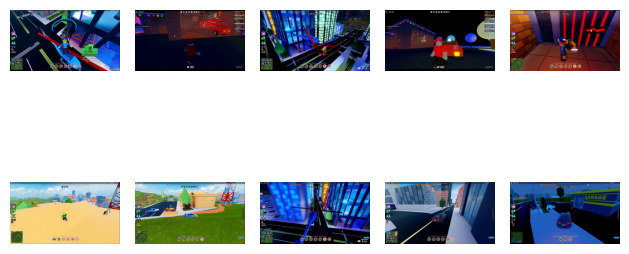

In [46]:
fig.tight_layout()
fig

We can also draw random samples from our DataFrame:

In [47]:
df.sample(10)

image           label
175           ../data/Dataset/data/Roblox/image_406.png          Roblox
2248    ../data/Dataset/data/Apex Legends/image_152.png    Apex Legends
5120  ../data/Dataset/data/Genshin Impact/image_344.png  Genshin Impact
2659    ../data/Dataset/data/Apex Legends/image_269.png    Apex Legends
7089        ../data/Dataset/data/Fortnite/image_412.png        Fortnite
4536      ../data/Dataset/data/God of War/image_499.png      God of War
6298       ../data/Dataset/data/Free Fire/image_881.png       Free Fire
3909        ../data/Dataset/data/Among Us/image_497.png        Among Us
8729       ../data/Dataset/data/Minecraft/image_361.png       Minecraft
3404        ../data/Dataset/data/Among Us/image_695.png        Among Us

Let's take the `image` column from such a sampled DataFrame and visualize those images:

<bound method Figure.tight_layout of <Figure size 640x480 with 10 Axes>>

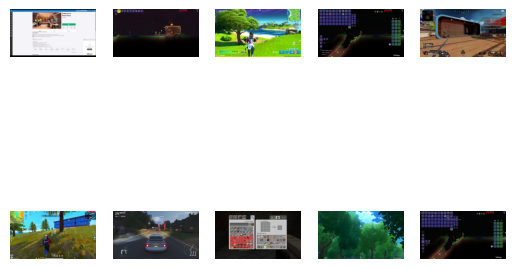

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=5)

for img_path, ax in zip(df.sample(10)['image'], axes.flatten()):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

fig.tight_layout

### 1.4.3 Adding labels

To make it more insightful, we can put the corresponding label on top of each image. To access the label of an image in the iteration, we'll need to iterate over entire rows of the DataFrame, as each row contains information on both the image and the corresponding label. To iterate over the rows of a DataFrame, you can use [`DataFrame.iterrows()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html):

In [49]:
for idx, row in df.sample(10).iterrows():
    print(idx)
    print(row)
    print()

2967
image    ../data/Dataset/data/Apex Legends/image_453.png
label                                       Apex Legends
Name: 2967, dtype: object

4234
image    ../data/Dataset/data/God of War/image_593.png
label                                       God of War
Name: 4234, dtype: object

8569
image    ../data/Dataset/data/Minecraft/image_99.png
label                                      Minecraft
Name: 8569, dtype: object

4031
image    ../data/Dataset/data/God of War/image_431.png
label                                       God of War
Name: 4031, dtype: object

8575
image    ../data/Dataset/data/Minecraft/image_718.png
label                                       Minecraft
Name: 8575, dtype: object

5935
image    ../data/Dataset/data/Genshin Impact/image_166.png
label                                       Genshin Impact
Name: 5935, dtype: object

5713
image    ../data/Dataset/data/Genshin Impact/image_459.png
label                                       Genshin Impact
Name: 5713, dtype: 

We can now access both the image path and the label of each row in the sampled DataFrame:

<bound method Figure.tight_layout of <Figure size 1500x750 with 50 Axes>>

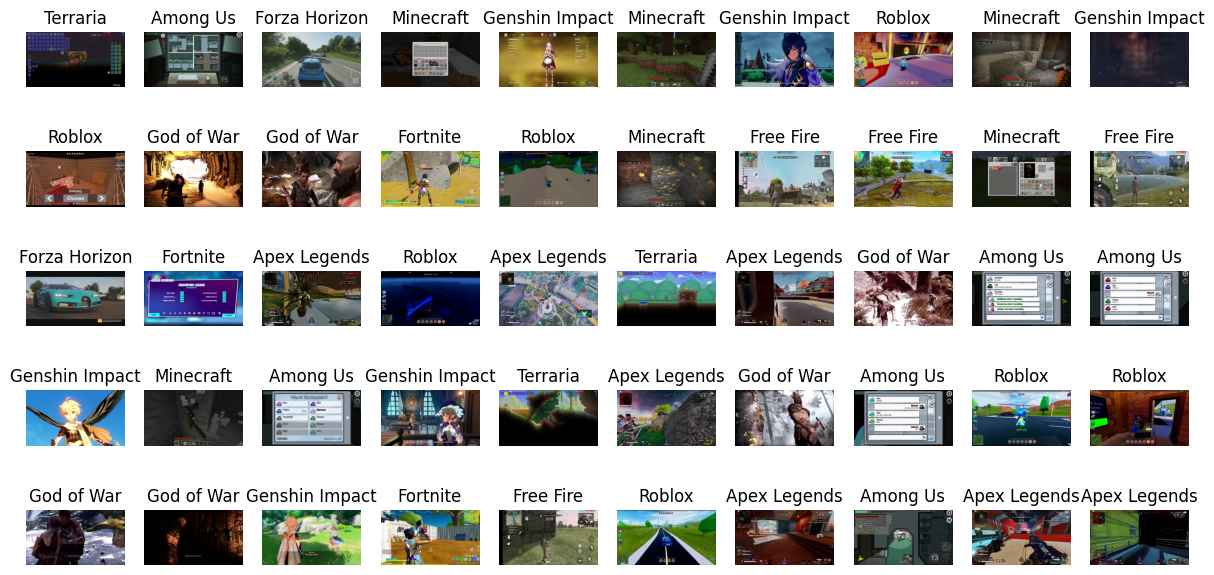

In [50]:
nrows = 5
ncols = 10

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*1.5, nrows*1.5))

for (idx, row), ax in zip(df.sample(nrows*ncols).iterrows(), axes.flatten()):
    img_path = row['image']
    label = row['label']
    
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

fig.tight_layout

Now, to put the Pokémon's name on top of each image, we can use [`Axes.set_title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html).

In [51]:
# zie bove

### 1.4.4 Visualizing images with a particular label

Another interesting inspection is to visualize some random images of a **particular label**. To get all DataFrame rows that belong to a certain label, you can use the following code:

In [52]:
df[df['label'] == 'God of War']

image       label
4000  ../data/Dataset/data/God of War/image_719.png  God of War
4001  ../data/Dataset/data/God of War/image_950.png  God of War
4002  ../data/Dataset/data/God of War/image_674.png  God of War
4003  ../data/Dataset/data/God of War/image_949.png  God of War
4004  ../data/Dataset/data/God of War/image_805.png  God of War
...                                             ...         ...
4995  ../data/Dataset/data/God of War/image_366.png  God of War
4996  ../data/Dataset/data/God of War/image_873.png  God of War
4997  ../data/Dataset/data/God of War/image_948.png  God of War
4998  ../data/Dataset/data/God of War/image_309.png  God of War
4999  ../data/Dataset/data/God of War/image_501.png  God of War

[1000 rows x 2 columns]

Now, we can just sample from these rows and run the same code as before.

<bound method Figure.tight_layout of <Figure size 1500x750 with 50 Axes>>

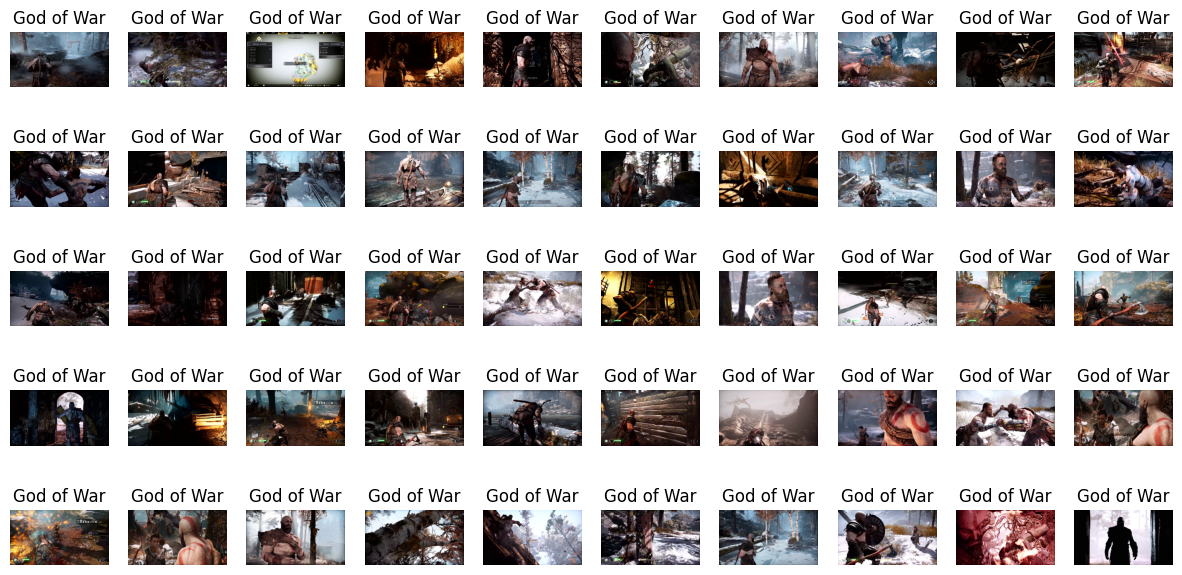

In [53]:
nrows = 5
ncols = 10

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*1.5, nrows*1.5))

df_select = df[df['label'] == 'God of War']

for (idx, row), ax in zip(df_select.sample(nrows*ncols).iterrows(), axes.flatten()):
    img_path = row['image']
    label = row['label']
    
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

fig.tight_layout

## 1.5 Inspecting data transforms

### 1.5.1 Transform images to the same size

When visualizing the images in the dataset, you might have noticed that the images have all kinds of sizes. When training a neural network, we'll want to create *batches* of images. Such a batch can only be created from images of the **same size**. Before we can start training, thus, we'll need a way to give each image the same size.

The [`torchvision` library](https://pytorch.org/vision/stable/index.html) contains some handy tools to help us with that. More specifically, we can make use of the transforms in [`torchvision.transforms.v2`](https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_getting_started.html). For example, with [`v2.Resize`](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.Resize.html#torchvision.transforms.v2.Resize), we can resize an image to a fixed size.

In [54]:
from torchvision.transforms import v2

resize = v2.Resize(size=(224,224))

To apply this resize transform to an image, we simply call the transform with the image as an argument:

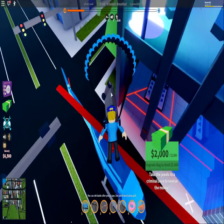

In [55]:
img_path = df['image'][0]
img = Image.open(img_path)

resize(img)

As you can see, `Resize()` has resized our image such that the smallest size became equal to `224`. You can also pass in a width and height to `Resize()`, but this might change the aspect ratio of your image:

In [56]:
# ... WRITE YOUR CODE HERE ... #

What if we want all images to be of size $224\times 224$, but don't want our aspect ratio to drastically change? Well, we can resize the shortest side of the image to a fixed size and then **crop** out the center square.

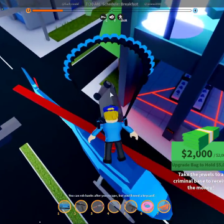

In [57]:
img_path = df['image'][0]
img = Image.open(img_path)

resize = v2.Resize(size=224)
center_crop = v2.CenterCrop(size=224)

img = resize(img)
img = center_crop(img)

img

An easier way to apply a chain of transforms to an image is with [`v2.Compose`](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.Compose.html#torchvision.transforms.v2.Compose):

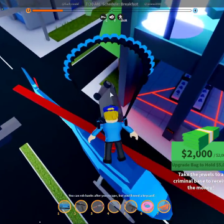

In [58]:
transforms = v2.Compose([
    v2.Resize(size=224),
    v2.CenterCrop(size=224)
])

img_path = df['image'][0]
img = Image.open(img_path)

transforms(img)

We can also apply this transform to multiple images:

<bound method Figure.tight_layout of <Figure size 1500x750 with 50 Axes>>

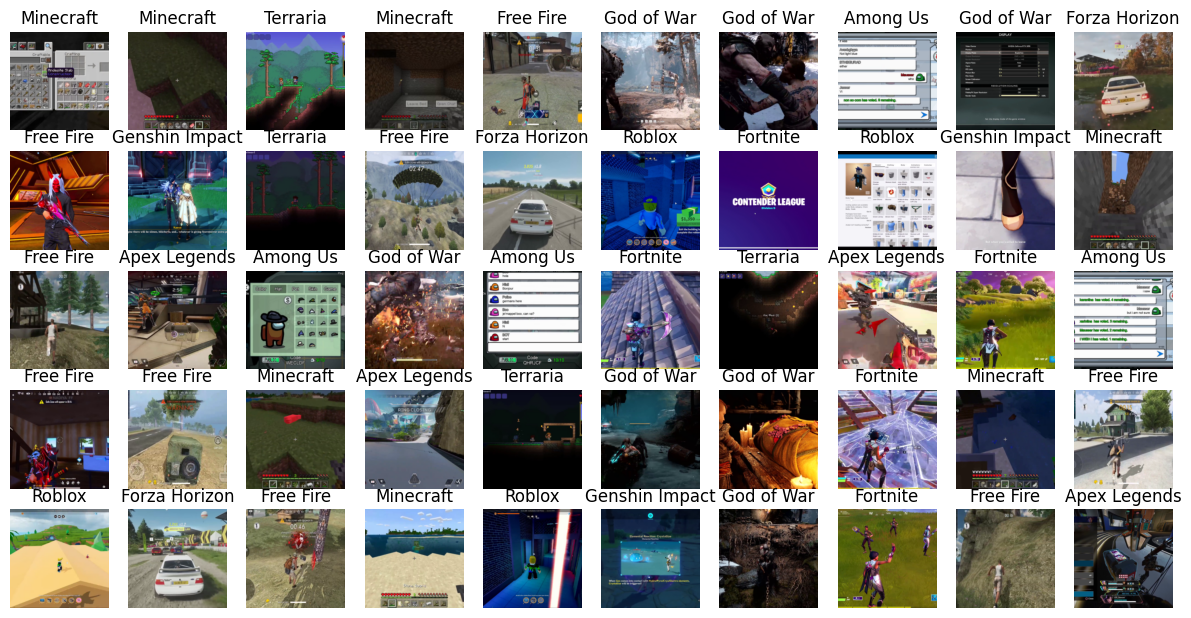

In [59]:
nrows = 5
ncols = 10

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*1.5, nrows*1.5))

df_select = df[df['label'] == 'Charmander']

for (idx, row), ax in zip(df.sample(nrows*ncols).iterrows(), axes.flatten()):
    img_path = row['image']
    label = row['label']
    
    img = Image.open(img_path)
    img = transforms(img)

    ax.imshow(img)
    ax.set_title(label)
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

fig.tight_layout

### 1.5.2 Data augmentation

Apart from ensuring that all images can be put in a batch, another important use of data transforms is to **augment the dataset**. The idea of *data augmentation* is to apply image transforms that our model should be invariant against. If a certain image is somewhat zoomed in, the aspect ratio has changed slightly, or the image is rotated by 10°, for example, we still want our model to recognize the Pokémon.

Let's first put our image visualization logic inside a utility function.

In [84]:
import torch
def visualize_df(df, ncols=10, transforms=None):
    nrows = len(df) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*1.5, nrows*1.5))

    for (idx, row), ax in zip(df.sample(nrows*ncols).iterrows(), axes.flatten()):
        img_path = row['image']
        label = row['label']
        
        img = Image.open(img_path).convert('RGB')

        if transforms is not None:
            img = transforms(img)

        if isinstance(img, torch.Tensor):
            img = img.permute(1, 2, 0)
            img = img.numpy()

        ax.imshow(img)
        ax.set_title(label)
        ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
        ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)

    fig.tight_layout

Next, we sample some images from the DataFrame and show them without any transforms.

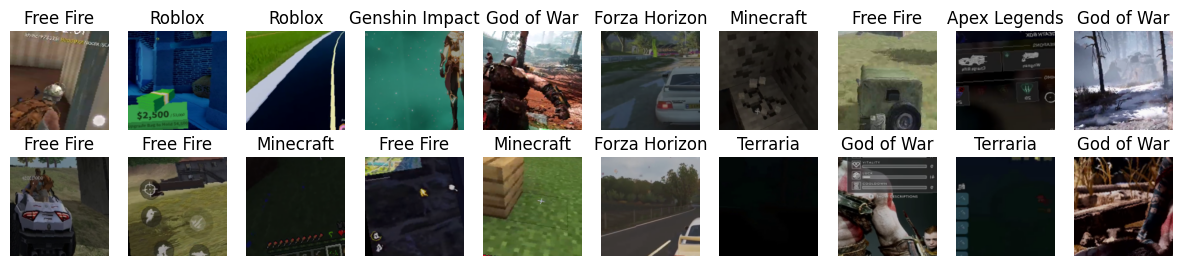

In [85]:
transforms = v2.Compose([
    v2.RandomRotation(degrees=10),
    v2.RandomResizedCrop(224, scale=(0.1, 0.2), ratio=(3/4, 4/3)),
    v2.RandomHorizontalFlip(),
    v2.ColorJitter(brightness=0.5)
])

visualize_df(df.sample(20), ncols=10 ,transforms=transforms)

Let's now play around with some combinations of transforms and visualize their effect on the images. See [this page](https://pytorch.org/vision/stable/transforms.html#v2-api-reference-recommended) for an overview of the available image transforms.

In [62]:
# ... WRITE YOUR CODE HERE ... #

In [63]:
# ... WRITE YOUR CODE HERE ... #

In [64]:
# ... WRITE YOUR CODE HERE ... #

In [65]:
# ... WRITE YOUR CODE HERE ... #

### 1.5.3 Data type conversion and normalization

Our images are [`PIL.Image` instances](https://pillow.readthedocs.io/en/stable/reference/Image.html). Our neural network, however, will expect `torch.Tensor` objects with `torch.float32` numbers that are (roughly) normally distributed with zero mean and unit variance.

To convert a `PIL.Image` to a PyTorch tensor, you can use [`v2.ToImage()`](https://pytorch.org/vision/main/generated/torchvision.transforms.v2.ToImage.html). The name of this transform might be somewhat confusing at first sight, but it is named so because it converts the input into a [`torchvision.tv_tensors.Image`](https://pytorch.org/vision/main/generated/torchvision.tv_tensors.Image.html#torchvision.tv_tensors.Image) instance, which is a subclass of [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor) for images.

In [86]:
transforms = v2.Compose([
    v2.RandomRotation(degrees=10),
    v2.RandomResizedCrop(224, scale=(0.1, 0.2), ratio=(3/4, 4/3)),
    v2.RandomHorizontalFlip(),
    v2.ColorJitter(brightness=0.5),
    v2.ToImage()
])

img = Image.open(df['image'][0])
transforms(img)


Image([[[ 21,  20,  20,  ..., 125, 106, 105],
        [ 21,  20,  20,  ..., 131, 104,  69],
        [ 21,  20,  20,  ..., 111,  80,  38],
        ...,
        [ 77,  41,  13,  ...,   0,   0,   1],
        [ 12,   4,   3,  ...,   0,   0,   1],
        [  1,   2,   1,  ...,   0,   0,   1]],

       [[ 34,  35,  35,  ..., 150, 132, 133],
        [ 34,  35,  35,  ..., 155, 131,  99],
        [ 34,  35,  35,  ..., 138, 110,  71],
        ...,
        [ 90,  53,  24,  ...,   9,   9,   9],
        [ 24,  16,  14,  ...,   9,   9,   9],
        [ 13,  14,  13,  ...,   9,   9,   9]],

       [[ 52,  52,  52,  ..., 174, 144, 132],
        [ 52,  52,  52,  ..., 172, 133,  86],
        [ 52,  53,  53,  ..., 141,  96,  41],
        ...,
        [111,  76,  49,  ...,  27,  27,  27],
        [ 49,  40,  38,  ...,  27,  27,  27],
        [ 37,  38,  37,  ...,  27,  27,  27]]], dtype=torch.uint8, )

As you can see, the data stored in our `PIL.Image` consists of 8 bit unsigned integers (0 - 255). To convert this to `torch.float32` numbers, we can use the [`v2.ToDtype()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.ToDtype.html#torchvision.transforms.v2.ToDtype) transform.

In [87]:
import torch
transforms = v2.Compose([
    v2.RandomRotation(degrees=10),
    v2.RandomResizedCrop(224, scale=(0.1, 0.2), ratio=(3/4, 4/3)),
    v2.RandomHorizontalFlip(),
    v2.ColorJitter(brightness=0.5),
    v2.ToImage(),
    v2.ToDtype(torch.float32),
])

img = Image.open(df['image'][0])
transforms(img)


Image([[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        ...,
        [ 92., 170., 116.,  ...,   0.,   0.,   0.],
        [ 73., 126., 168.,  ...,   0.,   0.,   0.],
        [ 75., 107., 173.,  ...,   0.,   0.,   0.]],

       [[  6.,   6.,   6.,  ...,  12.,  12.,  12.],
        [  6.,   6.,   6.,  ...,  12.,  12.,  12.],
        [  5.,   6.,   6.,  ...,  12.,  12.,  12.],
        ...,
        [ 74., 121.,  88.,  ...,   4.,   4.,   4.],
        [ 71.,  99., 119.,  ...,   4.,   4.,   4.],
        [ 69.,  72., 121.,  ...,   4.,   4.,   4.]],

       [[ 21.,  21.,  21.,  ...,  30.,  30.,  30.],
        [ 21.,  21.,  21.,  ...,  30.,  30.,  30.],
        [ 20.,  21.,  21.,  ...,  30.,  30.,  30.],
        ...,
        [ 69.,  53.,  62.,  ...,  15.,  14.,  17.],
        [ 76.,  62.,  63.,  ...,  15.,  14.,  17.],
        [ 77.,  58.,  58.,  ...,  15.,  14.,  17.]]], )

But as you can see, these numbers are still between 0 and 255. If we pass `scale=True`, the numbers will be scaled between `0.0` and `1.0`:

In [88]:
import torch
transforms = v2.Compose([
    v2.RandomRotation(degrees=10),
    v2.RandomResizedCrop(224, scale=(0.1, 0.2), ratio=(3/4, 4/3)),
    v2.RandomHorizontalFlip(),
    v2.ColorJitter(brightness=0.5),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
])

img = Image.open(df['image'][0])
transforms(img)


Image([[[0.4902, 0.4824, 0.4824,  ..., 0.9137, 1.0000, 1.0000],
        [0.4902, 0.4824, 0.4824,  ..., 1.0000, 1.0000, 1.0000],
        [0.4902, 0.4824, 0.4824,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.1608, 0.1373, 0.1216],
        [0.0000, 0.0000, 0.0000,  ..., 0.1255, 0.1137, 0.0980],
        [0.0000, 0.0000, 0.0000,  ..., 0.0941, 0.0863, 0.0863]],

       [[0.9922, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
        [0.9922, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
        [0.9922, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [0.2667, 0.2706, 0.2784,  ..., 0.1412, 0.1373, 0.1255],
        [0.2588, 0.2667, 0.2706,  ..., 0.1333, 0.1333, 0.1333],
        [0.2471, 0.2588, 0.2706,  ..., 0.1255, 0.1333, 0.1333]],

       [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        ..

Now, with [`v2.Normalize()`](https://pytorch.org/vision/stable/generated/torchvision.transforms.v2.Normalize.html#torchvision.transforms.v2.Normalize), we can normalize our pixel values so that they'll approximately have zero mean and unit variance. `Normalize` expects two arguments: `mean` (the mean to subtract) and `std` (the standard deviation to divide by). We will use `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`. These values are the mean and std of [the ImageNet dataset](https://www.image-net.org/index.php), which is often used to pretrain neural networks.

In [89]:
import torch
transforms = v2.Compose([
    v2.RandomRotation(degrees=10),
    v2.RandomResizedCrop(224, scale=(0.1, 0.2), ratio=(3/4, 4/3)),
    v2.RandomHorizontalFlip(),
    v2.ColorJitter(brightness=0.5),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

img = Image.open(df['image'][0])
transforms(img)


Image([[[-0.4397, -0.6965, -0.9705,  ...,  2.2489,  2.2489,  2.2489],
        [ 0.5536, -0.1143, -0.7308,  ...,  2.2489,  2.2489,  2.2489],
        [ 0.9474,  0.7762,  0.2967,  ...,  2.2489,  2.2489,  2.2489],
        ...,
        [-2.1179, -2.1179, -2.1179,  ...,  1.6838,  1.6495,  1.6324],
        [-2.1179, -2.1179, -2.1179,  ...,  1.6495,  1.6495,  1.6324],
        [-2.1179, -2.1179, -2.1179,  ...,  1.6838,  1.6838,  1.6495]],

       [[ 0.2577,  0.0476, -0.1450,  ...,  2.4286,  2.4286,  2.4286],
        [ 1.2906,  0.6254,  0.0476,  ...,  2.4286,  2.4286,  2.4286],
        [ 1.6232,  1.4482,  1.0630,  ...,  2.4286,  2.4286,  2.4286],
        ...,
        [-1.9307, -1.9307, -1.9307,  ...,  1.0630,  1.0630,  1.0455],
        [-1.9307, -1.9307, -1.9307,  ...,  1.0980,  1.0980,  1.0630],
        [-1.9307, -1.9307, -1.9307,  ...,  1.1155,  1.1155,  1.0980]],

       [[ 0.2173, -0.4101, -0.9853,  ...,  2.6400,  2.6400,  2.6400],
        [ 1.3154,  0.3393, -0.5495,  ...,  2.6400,  2.6400, 

We can again chain these transforms with `v2.Compose()`:

In [70]:
# ... WRITE YOUR CODE HERE ... #

And we can prepend them with other transforms:

In [71]:
# ... WRITE YOUR CODE HERE ... #

For some transforms, you might gain a small amount of processing time by moving `v2.ToImage()` to the beginning of the transforms list, as the subsequent transforms will then be applied directly to PyTorch tensors instead of PIL images. Therefore, it is customary to use `v2.ToImage()` as the first transform.

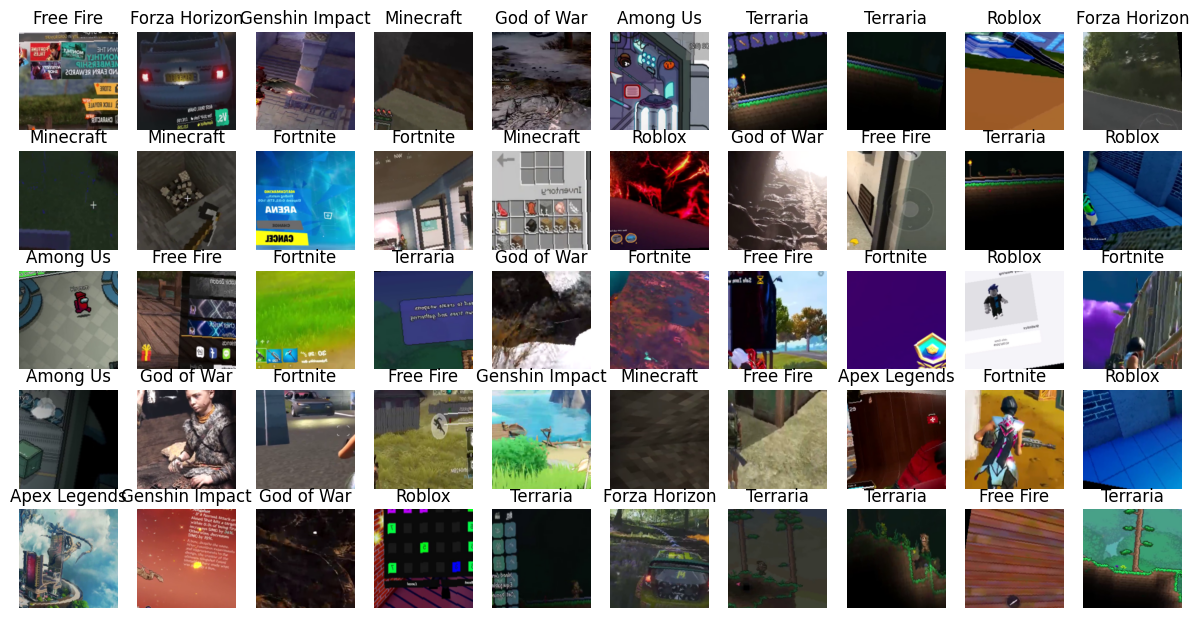

In [98]:
transforms = v2.Compose([
    v2.ToImage(),
    v2.RandomRotation(degrees=10),
    v2.RandomResizedCrop(224, scale=(0.1, 0.2), ratio=(3/4, 4/3), antialias=True),
    v2.RandomHorizontalFlip(),
])

visualize_df(df.sample(50), transforms=transforms)

Note that these normalized tensors cannot really be visualized directly, as the data range extends beyond $[0.0, 1.0]$ and the pixels will need to be clipped. These values won't be clipped for the neural network, however, so a visualization will not really be representative of what the neural network will actually receive.

In [73]:
# ... WRITE YOUR CODE HERE ... #

In [111]:
# PROJECT
sample = df.sample(10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

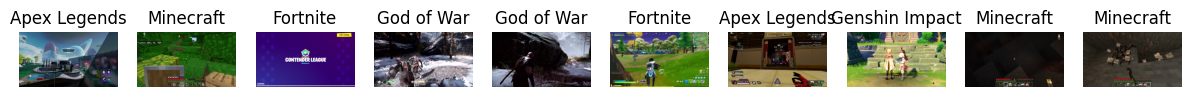

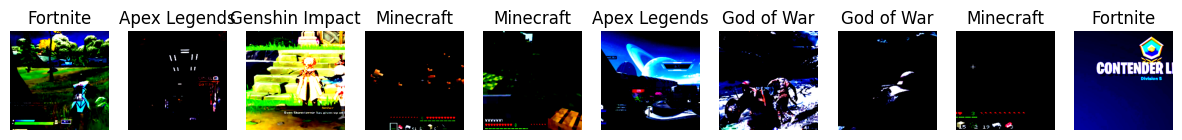

In [121]:
from typing import List

norm_mean: List[int] = [0.485, 0.456, 0.406]
norm_std: List[int] = [0.229, 0.224, 0.225]

transforms = v2.Compose([
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(224, antialias=True),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=norm_mean, std=norm_std),
])
visualize_df(sample)
visualize_df(sample, transforms=transforms)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

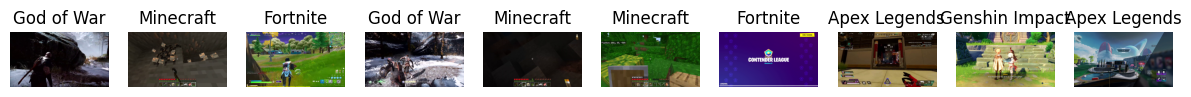

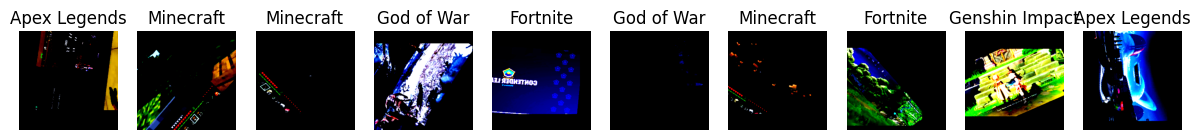

In [130]:
#aangepast
transforms = v2.Compose([
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        v2.RandomRotation(90),
        v2.Pad(100),
        v2.RandomResizedCrop(224, antialias=True),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=norm_mean, std=norm_std),
])
visualize_df(sample, transforms=None)
visualize_df(sample, transforms=transforms)